In [2]:
#Analysis notebook for a fast analysis of the propagation steps

import warnings
warnings.filterwarnings("ignore")

import uproot
import awkward as ak
import numpy as np
import pandas as pd
import plotly.express as px


#using plotly as backend
pd.options.plotting.backend = "plotly"

#use pandas instead of awkward array (doesn't work?)
uproot.default_libary="pd"

In [3]:
#The input file containing the propagation steps output

#bfield OFF
#inputFile="/Users/pbutti/sw/ldmx-sw/test/straight_propagator_states.root"
inputFile="/Users/pbutti/sw/ldmx-sw/single_test_interpolated/straight_propagator_states.root"


#1.15 T Constant BField
#inputFile="/Users/pbutti/sw/ldmx-sw/bfield_115_tgeo_v3/straight_propagator_states.root"

In [5]:
with uproot.open(inputFile) as infile:
    propagation_tree = infile["propagation_steps"]

    #Check the branches in the tree
    #print(propagation_tree.values())

    #Read in the X global position/direction of the steps as panda data frames
    step_position       = propagation_tree.arrays(["g_x","g_y","g_z","sensitive_id","approach_id","layer_id"],"layer_id>0",library="pd")
    step_position_sens  = propagation_tree.arrays(["g_x","g_y","g_z","sensitive_id","approach_id","layer_id"],"sensitive_id>-1",library="pd")
    step_direction = propagation_tree.arrays(["d_x","d_y","d_z"],library="pd")
    
    #print(step_position)
    #print(step_position.droplevel(level=1,axis=0))
    #make a flat df from the multi-index
    flat_step_position = step_position.reset_index()
    flat_step_position_sens = step_position_sens.reset_index()
    flat_step_position["color_id"] = flat_step_position["layer_id"] + 100*flat_step_position["sensitive_id"] 
    flat_step_position_sens["color_id"] = flat_step_position["layer_id"] + 100*flat_step_position["sensitive_id"]
    
    print(flat_step_position)
    
    #print(g_x)
    #fig = step_position["g_x"].plot.hist()
    #fig.show()
    
    make2DPlots = True
    
    if (make2DPlots):
        
        fig = flat_step_position.plot.scatter(x="g_x",y="g_y",color="layer_id")
        fig.update_traces(marker_size = 2)
        fig.show()
        
        fig = flat_step_position_sens.plot.scatter(x="g_x",y="g_y",color="layer_id")
        fig.update_traces(marker_size = 2)
        fig.show()
    
        fig = flat_step_position.plot.scatter(x="g_x",y="g_z",color="layer_id",range_y=[-24,-23])
        fig.update_traces(marker_size = 2)
        fig.show()
        
        fig = flat_step_position_sens.plot.scatter(x="g_x",y="g_z",color="layer_id",range_y=[-24,-23])
        fig.update_traces(marker_size = 2)
        #fig.ylim([3, 4])
        fig.show()
        
    
        #fig = px.scatter_3d(flat_step_position, x='g_x', y='g_y', z='g_z', color="layer_id")
        #fig.update_layout(autosize=False,margin=dict(l=0, r=0, b=0, t=0))
        #fig.update_traces(marker_size = 2)
        #fig.show()
        
        fig = px.scatter_3d(flat_step_position_sens, x='g_x', y='g_y', z='g_z', color="layer_id",range_z=[-24,-23])
        fig.update_layout(autosize=False,margin=dict(l=0, r=0, b=0, t=0))
        fig.update_traces(marker_size = 2)
        fig.show()
     
        
        
        pass

FileNotFoundError: file not found

    '/Users/pbutti/sw/ldmx-sw/single_test_interpolated/straight_propagator_states.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


     entry  subentry         g_x        g_y        g_z  sensitive_id  \
0        0        44 -613.161011 -28.262714   3.713084             0   
1        0        45 -613.000000 -28.251619   3.713084             1   
2        0        46 -612.838989 -28.240528   3.713084             0   
3        0        49 -607.161011 -27.851238   3.713084             0   
4        0        50 -607.000000 -27.840254   3.713084             1   
..     ...       ...         ...        ...        ...           ...   
181      4       320 -107.000000  -1.926105  34.316185             1   
182      4       321 -106.838997  -1.924206  34.316185             0   
183      4       368  -13.161000  -1.313779  34.316185             0   
184      4       369  -13.000000  -1.313580  34.316185             1   
185      4       370  -12.839000  -1.313383  34.316185             0   

     approach_id  layer_id  
0              2         2  
1              0         2  
2              1         2  
3              2   

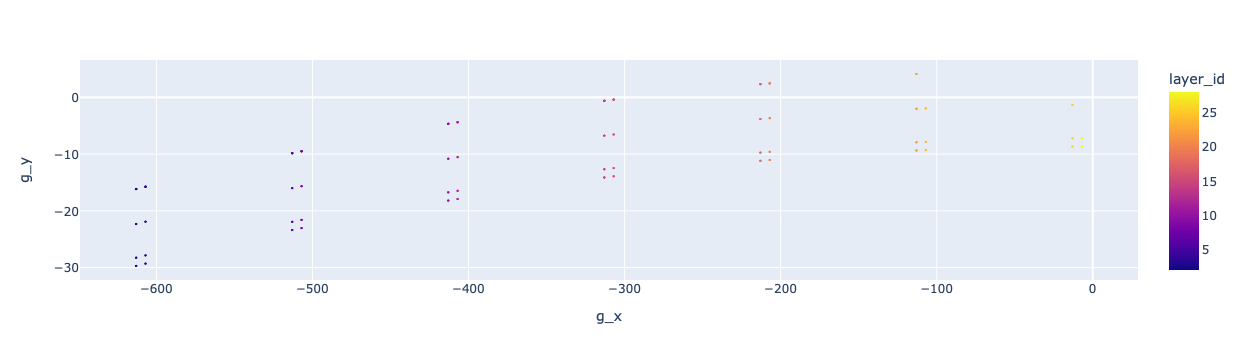

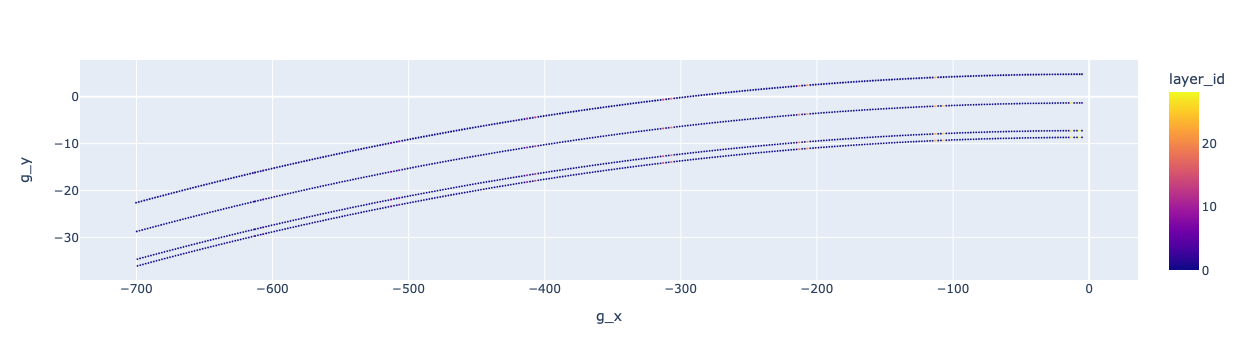

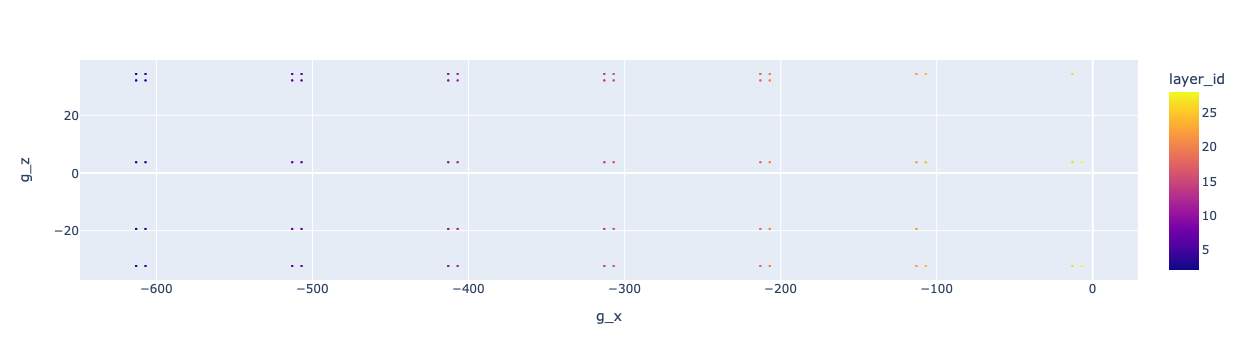

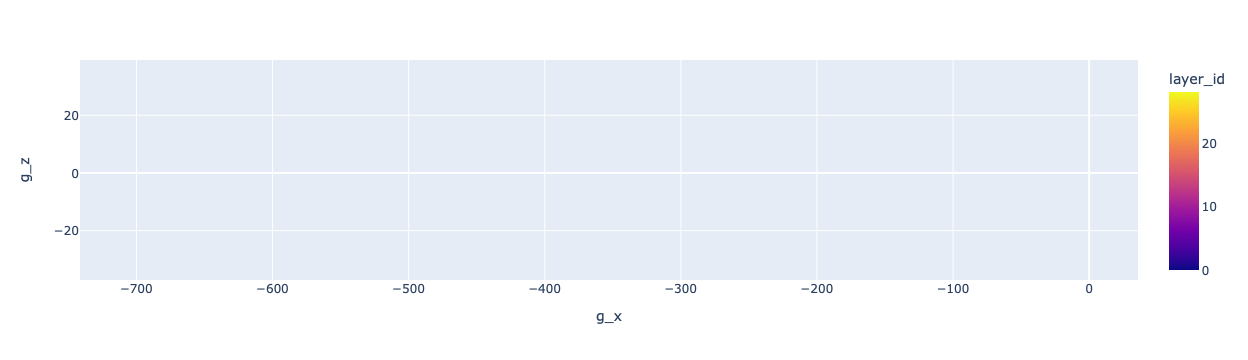

In [29]:
#1.15 T Constant BField
inputFile="/Users/pbutti/sw/ldmx-sw/test/straight_propagator_states.root"

with uproot.open(inputFile) as infile:
    propagation_tree = infile["propagation_steps"]

    #Check the branches in the tree
    #print(propagation_tree.values())

    #Read in the X global position/direction of the steps as panda data frames
    step_position       = propagation_tree.arrays(["g_x","g_y","g_z","sensitive_id","approach_id","layer_id"],"layer_id>0",library="pd")
    step_position_sens  = propagation_tree.arrays(["g_x","g_y","g_z","sensitive_id","approach_id","layer_id"],"sensitive_id>-1",library="pd")
    step_direction = propagation_tree.arrays(["d_x","d_y","d_z"],library="pd")
    
    #print(step_position)
    #print(step_position.droplevel(level=1,axis=0))
    #make a flat df from the multi-index
    flat_step_position = step_position.reset_index()
    flat_step_position_sens = step_position_sens.reset_index()
    
    print(flat_step_position)
    
    #print(g_x)
    #fig = step_position["g_x"].plot.hist()
    #fig.show()
    
    make2DPlots = True
    
    if (make2DPlots):
        
        fig = flat_step_position.plot.scatter(x="g_x",y="g_y",color="layer_id")
        fig.update_traces(marker_size = 2)
        fig.show()
        
        fig = flat_step_position_sens.plot.scatter(x="g_x",y="g_y",color="layer_id")
        fig.update_traces(marker_size = 2)
        fig.show()
    
        fig = flat_step_position.plot.scatter(x="g_x",y="g_z",color="layer_id")
        fig.update_traces(marker_size = 2)
        fig.show()
        
        fig = flat_step_position_sens.plot.scatter(x="g_x",y="g_z",color="layer_id")
        fig.update_traces(marker_size = 2)
        fig.show()
    
        #fig = px.scatter_3d(flat_step_position, x='g_x', y='g_y', z='g_z', color="layer_id")
        #fig.update_layout(autosize=False,margin=dict(l=0, r=0, b=0, t=0))
        #fig.update_traces(marker_size = 2)
        #fig.show()
        
        fig = px.scatter_3d(flat_step_position_sens, x='g_x', y='g_y', z='g_z', color="layer_id")
        fig.update_layout(autosize=False,margin=dict(l=0, r=0, b=0, t=0))
        fig.update_traces(marker_size = 2)
        fig.show()
        
        
        pass


